In [1]:
# from qiskit.test.mock import FakeBogota  # deprecated
from qiskit.providers.fake_provider import FakeBogota
backend = FakeBogota()

# from qiskit.providers.fake_provider import FakeAthens
# backend = FakeAthens()

# from qiskit.test.mock import FakeCambridge
# backend = FakeCambridge()

In [2]:
from qiskit.tools.jupyter import backend_overview

In [3]:
backend

<FakeBogota('fake_bogota')>

In [4]:
props = backend.properties()

In [5]:
for i in range(backend.configuration().n_qubits):
    print(f"The X gate has length {props.gate_length('x', i)*1e9} nanosecs")

The X gate has length 35.55555555555556 nanosecs
The X gate has length 35.55555555555556 nanosecs
The X gate has length 35.55555555555556 nanosecs
The X gate has length 35.55555555555556 nanosecs
The X gate has length 35.55555555555556 nanosecs


In [6]:
# let's construct a quantum circuit with four qubits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
q = QuantumRegister(4)
c = ClassicalRegister(4)
qc = QuantumCircuit(q, c)

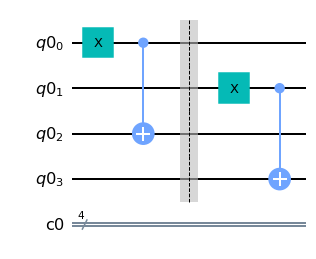

In [7]:
qc.x(q[0])
qc.cx(q[0], q[2]) # we can see from the diagram above, this is not possible since q0 and q2 are not connected
qc.barrier()
qc.x(q[1])
qc.cx(q[1], q[3])  # this is also not possible since q1 and q3 are also not connected
qc.draw('mpl')

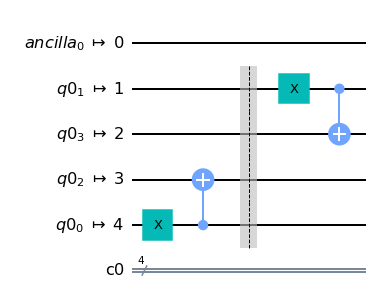

In [8]:
# to make the above circuit work, we will use the transpile function
from qiskit import transpile
qc_compiled = transpile(qc, backend)
qc_compiled.draw('mpl')

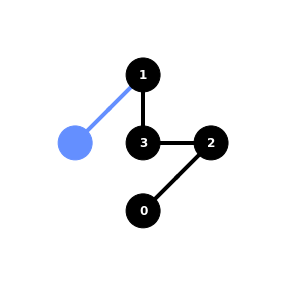

In [9]:
from qiskit.visualization import plot_circuit_layout
plot_circuit_layout(qc_compiled, backend)

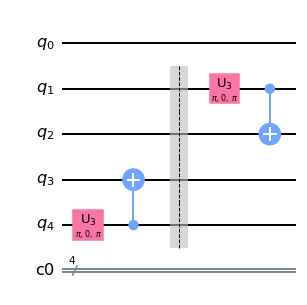

In [10]:
qc_compiled.decompose().draw('mpl')

In [11]:
qc_manually_compiled = transpile(qc, backend, initial_layout=[3,4,1,0])

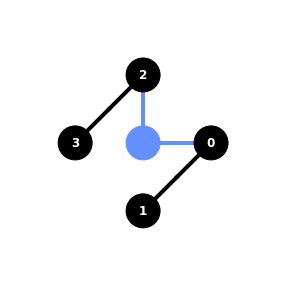

In [12]:
plot_circuit_layout(qc_manually_compiled, backend)

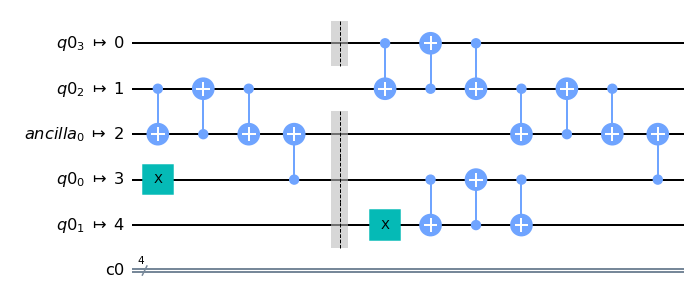

In [13]:
qc_manually_compiled.draw('mpl')

In [14]:
qc_compiled.depth()

4

In [15]:
qc_manually_compiled.depth()

11

In [16]:
for i in range(4):
    qc_compiled_optimization = transpile(qc, backend, optimization_level=i)
    print(f'Optimization level {i}')
    print(f'Depth: {qc_compiled_optimization.depth()}')
    print(f'Gate counts: {qc_compiled_optimization.count_ops()}')
    print()

Optimization level 0
Depth: 10
Gate counts: OrderedDict([('cx', 11), ('x', 2), ('barrier', 1)])

Optimization level 1
Depth: 4
Gate counts: OrderedDict([('x', 2), ('cx', 2), ('barrier', 1)])

Optimization level 2
Depth: 4
Gate counts: OrderedDict([('x', 2), ('cx', 2), ('barrier', 1)])

Optimization level 3
Depth: 4
Gate counts: OrderedDict([('x', 2), ('cx', 2), ('barrier', 1)])



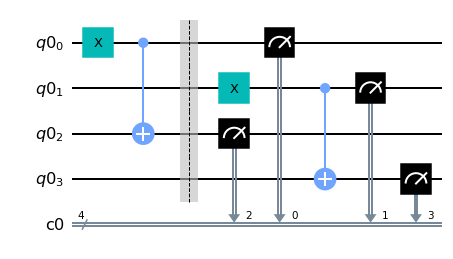

In [17]:
for i in range(4):
    qc.measure(q[i], c[i])

qc.draw('mpl')

In [18]:
qc0 = transpile(qc, backend, optimization_level=0)
qc1 = transpile(qc, backend, optimization_level=1)
qc2 = transpile(qc, backend, optimization_level=2)
qc3 = transpile(qc, backend, optimization_level=3)

In [19]:
qc_list = [qc0, qc1, qc2, qc3]

In [20]:
job = backend.run(qc_list, shots=1024)
result = job.result()
counts = result.get_counts()
print(counts)

[{'0110': 7, '1000': 6, '0010': 9, '1010': 23, '0101': 30, '0000': 19, '0011': 68, '0001': 10, '1100': 6, '0100': 20, '1001': 9, '1011': 102, '0111': 89, '1101': 20, '1111': 556, '1110': 50}, {'1001': 3, '0110': 2, '0010': 1, '0101': 4, '1111': 827, '1101': 29, '0100': 1, '1100': 1, '1110': 47, '0011': 5, '0111': 40, '1011': 55, '1010': 9}, {'1001': 2, '0110': 5, '1010': 8, '0101': 5, '1101': 39, '1100': 3, '1110': 54, '1011': 70, '0011': 3, '0111': 47, '1111': 788}, {'0101': 3, '1100': 2, '0100': 1, '0110': 1, '1010': 7, '1001': 3, '1111': 817, '1101': 37, '1110': 44, '1011': 61, '0011': 4, '0111': 44}]


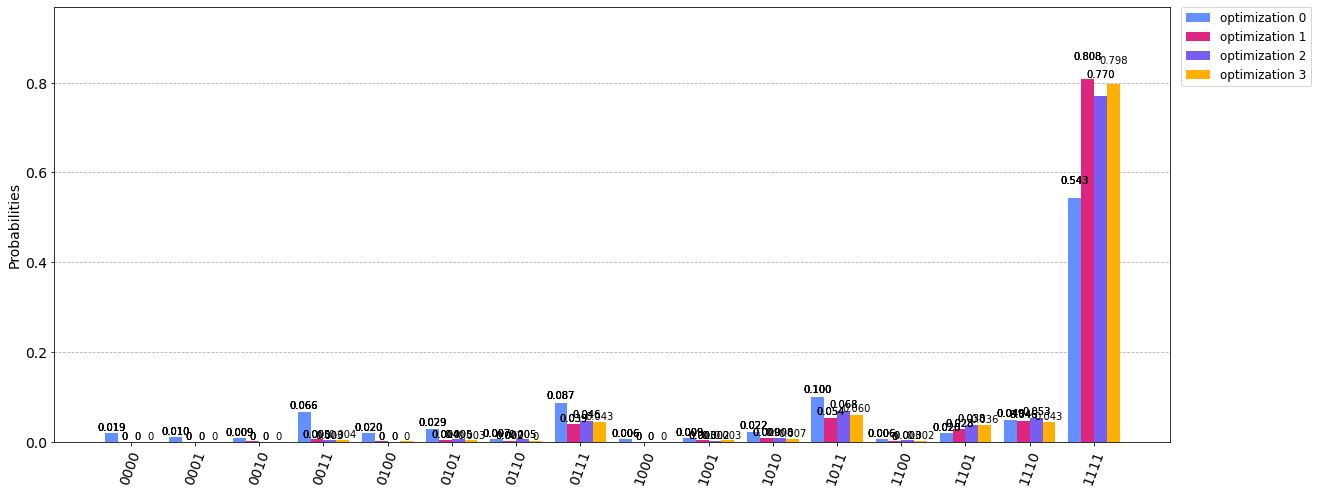

In [22]:
from qiskit.visualization import plot_histogram
plot_histogram(counts, figsize=(20, 8), legend=['optimization 0', 'optimization 1', 'optimization 2', 'optimization 3'])
# Optimization 1111 is the correct answer, the remaining answers are due to decoherance and error